# Data analysis

## One-way ANOVA
ANOVA stands for "Analysis of Variance" and is an omnibus test, meaning it tests for a difference overall between all groups. The one-way ANOVA, also referred to as one factor ANOVA, is a parametric test used **to test for a statistically significant difference of an outcome between 3 or more groups**. Since it is an omnibus test, it tests for a difference overall, i.e. at least one of the groups is statistically significantly different than the others. However, if the ANOVA is significant one cannot tell which group is different. In order to tell which group is different, one has to conduct planned or post-hoc.

>### Parametric test assumptions
>
> - Population distributions are normal
> - Samples have equal variances
> - Independence

In [1]:
import pandas as pd
#import researchpy as rp
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [20]:
rslt_df = pd.read_csv('color2.csv', delimiter=';')

In [21]:
rslt_df

,Sample,Treatment,Time,L,a,b,C,h
0,Control,0,0,63.69,31.41,20.97,37.77,0.59
1,Control,0,0,63.89,27.81,20.63,34.63,0.64
2,Control,0,0,66.31,29.11,17.82,34.13,0.55
3,Control,0,0,62.11,30.52,19.95,36.46,0.58
4,Control,0,0,64.56,25.93,17.76,31.43,0.60
5,Control,0,0,60.38,25.54,15.43,29.84,0.54
6,Control,0,0,64.30,27.99,15.82,32.15,0.51
7,Control,0,0,59.16,25.72,15.76,30.16,0.55
8,Control,0,0,66.33,23.73,13.11,27.11,0.50
9,Control,0,0,70.45,21.30,14.25,25.63,0.59


In [22]:
# Recoding value from numeric to string
#df['dose'].replace({1: 'placebo', 2: 'low', 3: 'high'}, inplace= True)

In [23]:
stats.f_oneway(rslt_df['L'][rslt_df['Treatment'] == 0],
               rslt_df['L'][rslt_df['Treatment'] == 50],
               rslt_df['L'][rslt_df['Treatment'] == 100])

F_onewayResult(statistic=76.47965340424217, pvalue=4.0745940890717077e-13)

## Post-hoc Testing
By conducting post-hoc tests or planned comparisons it allows one to see which group(s) significantly differ from each other; remember that the ANOVA is an omnibus test! There are a few different approaches that can be taken while conducting these tests, ones that are implemented in StatsModels currently are:
- Tukey Honestly Significant Difference (HSD)
    - Tests all pairwise group comparisons while controlling for the multiple comparisons which protects the familywise error rate and from making a Type I error
    - Not technically a "post-hoc" test since this test can be used as a test independently of the ANOVA and can be planned before hand
    - More in-depth information about this statistical method can be found [here](https://dx.doi.org/10.4135/9781412961288.n478)


In [24]:
import statsmodels.stats.multicomp as mc

comp = mc.MultiComparison(rslt_df['L'], rslt_df['Treatment'])
post_hoc_res = comp.tukeyhsd()
post_hoc_res.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
0,50,-16.285,0.001,-19.5307,-13.0393,True
0,100,-6.7717,0.001,-10.0173,-3.526,True
50,100,9.5133,0.001,6.2677,12.759,True


/opt/miniconda3/envs/pythonlab/lib/python3.8/site-packages/statsmodels/sandbox/stats/multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


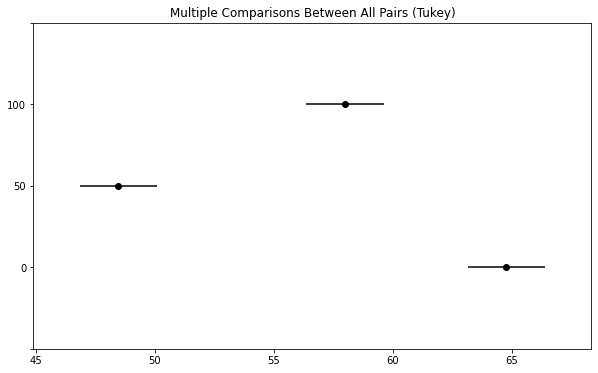

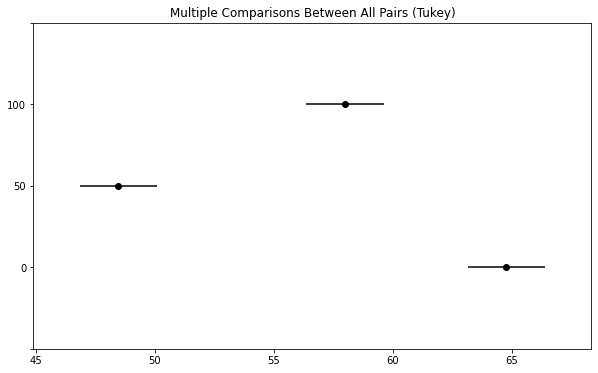

In [25]:
post_hoc_res.plot_simultaneous()

In [26]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [28]:
%R library(agricolae)

%R A <- read.csv2("color2.csv",header = TRUE, dec = ".")  #Open the file and read the data 

%R A$L<-as.numeric(A$L)  # Indicates which column has to be taken as numeric variable

## Decide if the factor is numeric or categorical (can take on one of a limited, and usually fixed, number of possible values)
## Comment or uncomment the corresponding lines

## For a categorical factor
%R m1<-aov(L~Sample,A)  
%R out1<-HSD.test(m1,"Sample",console = FALSE)
%R -o t t=out1$groups

## For a numerical (continuous) factor
#%R A$Treatment<-factor(A$Treatment) # Indicates which column has to be taken as numerical factor
#%R m2<-aov(L~Treatment,A)
#%R out2<-HSD.test(m2,"Treatment",console = FALSE)
#%R -o t t=out2$groups

,L,groups
Control,64.760000,a
100Trehalose,57.988333,b
50Trehalose,48.475000,c


## Parametric Test

>## Population distributions are normal
>
> The assumption of normality is tested on the residuals of the model when coming from an ANOVA or regression framework. One method for testing the assumption of normality is the Shapiro-Wilk test.
> The output is (W-test statistic, p-value)

In [29]:
model = ols('L ~ C(Sample)', data=rslt_df[['Sample', 'L']]).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
#aov_table
stats.shapiro(model.resid)

ShapiroResult(statistic=0.9598560929298401, pvalue=0.21277955174446106)

If the test is non-significant (pvalue < 0.05) this indicates indicates that the residuals are normally distributed

Another way to test the assumption is through a visual check. This is helpful when the sample is large. The reason this is true is that as the sample size increases, the statistical test's ability to reject the null hypothesis increases, i.e. it gains power to detect smaller differences as the sample size n increases.

One method of visually checking the distribution is to use a probability plot with or without the correlation value,
$R^2$, to assess the observed values correlation with the theoretical distribution in question. This can be completed by using the probplot() method from Scipy.stats. If using the $R^2$ measure, one can refer to the [NIST/SEMATECH e-handbook of statistical methods](https://www.itl.nist.gov/div898/handbook/eda/section3/eda3676.htm) to see if the value is significant.

Looking at the plotted probability plot and the residual structure could be necessary to transform the data for the analysis, or to use a non-parametric statistical test such as Welch's ANOVA or the Kruskal-Wallis ANOVA.

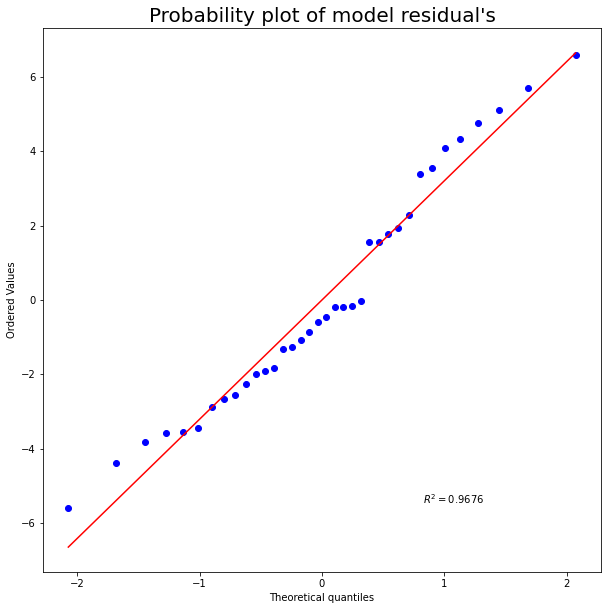

In [30]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(model.resid, plot= plt, rvalue= True)
ax.set_title("Probability plot of model residual's", fontsize= 20)
ax.set

plt.show()

>## Homogeneity of variance
>
> The final assumption is that all groups have equal variances. One method for testing this assumption is the Levene's test of homogeneity of variances. This can be completed using the levene() method from Scipy.stats. 

In [31]:
stats.levene(rslt_df['L'][rslt_df['Sample'] == 'Control'],
               rslt_df['L'][rslt_df['Sample'] == '50Trehalose'],
               rslt_df['L'][rslt_df['Sample'] == '100Trehalose'])

LeveneResult(statistic=0.11012938364511131, pvalue=0.8960460420084955)

If the Levene's test of homogeneity of variances is not significant it's indicates that the groups have non-statistically significant difference in their varability. Again, it may be worthwhile to check this assumption visually as well.

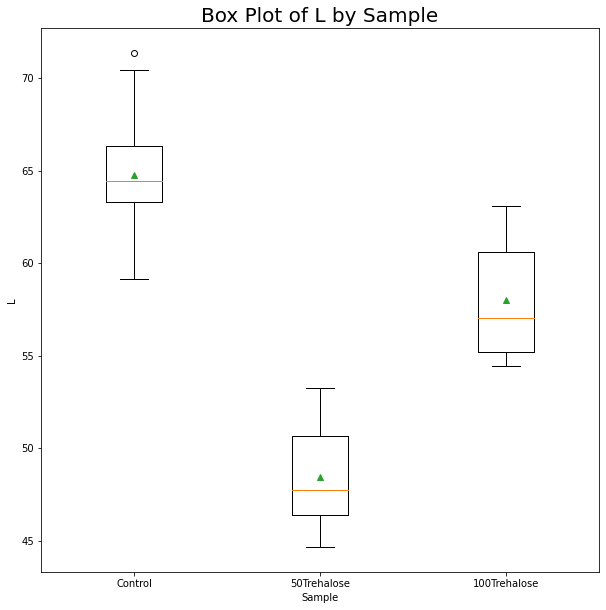

In [32]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of L by Sample", fontsize= 20)
ax.set

data =  [rslt_df['L'][rslt_df['Sample'] == 'Control'],
         rslt_df['L'][rslt_df['Sample'] == '50Trehalose'],
         rslt_df['L'][rslt_df['Sample'] == '100Trehalose']]

ax.boxplot(data,
           labels= ['Control', '50Trehalose', '100Trehalose'],
           showmeans= True)

plt.xlabel("Sample")
plt.ylabel("L")

plt.show()

The graphical testing of homogeneity of variances supports the statistical testing findings which is the groups have equal variance.

By default box plots show the median (orange line in graph above). The green triangle is the mean for each group which was an additional argument that was passed into the method.

There are different ways to handle heteroskedasticity (unequal variance) and a decision needs to be made. Some options include, but is not limited to, transformming the dependent variable (outcome), could use trimmed means, robust standard errors, or use a parametric test suchs as the Welch's t-test. For a more in-depth look at the assumptions and some potential remedies, please check out this [page](https://www.pythonfordatascience.org/parametric-assumptions-python/). 